In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id': '1tg7uu8GvstsNh8tMo5xq0kyCz9PHgB9s'})
downloaded.GetContentFile('train_identity.csv')

In [ ]:
downloaded = drive.CreateFile({'id': '1fFEYaig3cowq6K_TkJAt4DpMW3zVxekR'})
downloaded.GetContentFile('train_transaction.csv')

In [ ]:
identity = pd.read_csv('train_identity.csv', encoding='latin-1')

identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
transaction = pd.read_csv('train_transaction.csv', encoding='latin-1')

transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
transaction['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [ ]:
join = transaction.merge(identity, left_on= 'TransactionID', right_on='TransactionID',how='outer')

In [ ]:
fraudes = join[join['isFraud'] == 1]
no_fraudes = join[join['isFraud'] == 0]

In [ ]:
corr = join.corr()
corr

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,-0.027043,-0.026273,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.074338,0.026477,-0.006997,0.058633,0.002053,0.081941,-0.071569,-0.071505,-0.015457,0.056533,0.100242,0.052536,0.023352,0.095742,...,0.222991,0.227296,0.089691,0.251746,0.242576,0.240570,0.244867,0.250831,0.199285,0.219190,0.223816,0.005893,0.179740,0.103030,0.074034,0.203922,0.162702,-0.094145,0.170335,-0.023269,-0.000268,-0.061198,-0.026956,-0.119807,0.036772,-0.032954,0.009245,0.031831,0.085015,0.043151,0.222829,0.111975,-0.015030,0.084105,-0.029004,0.052621,-0.038339,0.020672,0.013670,-0.066437
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,0.021522,-0.019054,0.030570,0.037229,-0.006833,0.030382,-0.030754,0.020909,0.028160,0.032139,-0.031703,0.028396,0.027484,0.031905,-0.011146,0.007921,-0.067193,-0.083583,-0.046271,-0.067216,-0.064638,-0.057236,-0.127199,-0.142636,-0.044253,-0.072002,-0.045094,-0.028864,-0.059430,-0.008663,...,-0.023329,-0.024006,0.007792,-0.006838,-0.001050,-0.011053,-0.023099,-0.021164,-0.021982,-0.023468,-0.024134,-0.000451,-0.005456,-0.002402,-0.005702,-0.019356,-0.014663,-0.120099,0.049398,0.041457,-0.059701,-0.007978,-0.027139,-0.084768,-0.057489,0.029431,0.011043,0.007914,-0.019538,0.057324,0.150100,0.050004,-0.041721,0.061597,0.063544,0.118409,-0.001905,0.034045,0.099587,0.069702
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,-0.027295,-0.026860,-0.049318,-0.051126,-0.007546,-0.053104,0.023800,-0.046612,-0.055402,-0.056288,0.032732,-0.057734,-0.050181,-0.054738,-0.015022,-0.039721,0.074031,0.027109,-0.007200,0.059797,0.001767,0.084581,-0.070221,-0.068752,-0.013735,0.058409,0.101266,0.053108,0.024405,0.097509,...,0.230193,0.234674,0.091039,0.257295,0.248494,0.247530,0.252599,0.258603,0.205671,0.226312,0.231072,0.005762,0.184407,0.105783,0.075892,0.210240,0.167524,-0.092185,0.165871,-0.021693,-0.000580,-0.060909,-0.026329,-0.123596,0.035117,-0.032267,0.008721,0.030883,0.086939,0.044079,0.214802,0.110234,-0.011815,0.082009,-0.024249,0.051437,-0.031312,0.020372,0.017790,-0.071392
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,0.026146,0.023143,-0.017722,-0.018468,-0.004798,-0.010148,-0.030560,-0.016982,-0.017061,-0.014820,-0.030021,-0.015958,-0.017313,-0.017135,-0.040034,-0.022435,-0.039985,-0.003760,-0.002166,-0.050347,-0.001490,0.057674,0.099719,0.096806,0.073852,-0.038982,-0.088448,-0.065834,0.041298,0.072110,...,-0.011397,-0.009281,0.018288,-0.069407,-0.046455,0.038277,-0.004608,0.003909,0.024319,0.010808,0.017385,0.078751,0.044830,0.070651,0.129452,0.082064,0.105996,0.036542,-0.055584,-0.002813,0.002748,0.076302,0.025777,0.085212,-0.016246,0.008281,-0.004869,-0.040908,0.060246,-0.055490,-0.334971,-0.096851,0.076174,-0.105866,-0.031840,-0.104620,0.080110,0.016145,0.023098,-0.041851
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,0.005152,-0.003749,0.005716,0.005199,-0.004710,0.005193,0.005752,0.006575,0.004641,0.004645,0.004370,0.003794,0.005808,0.004210,0.004300,0.007366,-0.006619,-0.012949,-0.005352,-0.002721,-0.003120,-0.002899,-0.022303,-0.040851,-0.000275,-0.000844,-0.005144,-0.020610,-0.028603,0.034955,...,0.133649,0.138616,0.031315,0.079462,0.098211,0.134419,0.142539,0.146483,0.121763,0.13315

In [ ]:
c = corr[corr['isFraud'] < 1]
corr[corr['isFraud'] == c['isFraud'].max()]

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
V257,0.057887,0.38306,0.056084,-0.009878,-0.011014,-0.037453,0.118856,-0.050463,0.010586,-0.052649,NaN,-0.022323,0.024143,0.03098,-0.01219,0.010024,NaN,0.010077,0.009052,0.012927,NaN,0.005001,0.01577,0.014955,-0.002828,0.000523,-0.012526,-0.086468,0.020608,-0.031811,-0.127358,-0.037575,-0.12115,-0.095893,-0.010448,-0.036209,NaN,-0.021015,-0.045078,0.012993,...,0.155158,0.158483,0.091578,0.053745,0.079097,0.20763,0.164462,0.174858,0.152367,0.153708,0.154314,0.023486,0.053939,0.041966,0.052862,0.078706,0.074537,-0.092661,0.04583,0.007376,-0.004076,-0.032117,0.009851,-0.025263,0.017197,0.001999,0.007071,0.011424,-0.01041,0.024008,0.135396,0.050495,-0.031539,0.052427,0.065477,-0.024699,0.052018,0.036469,0.057809,-0.012381


# Bar Plot

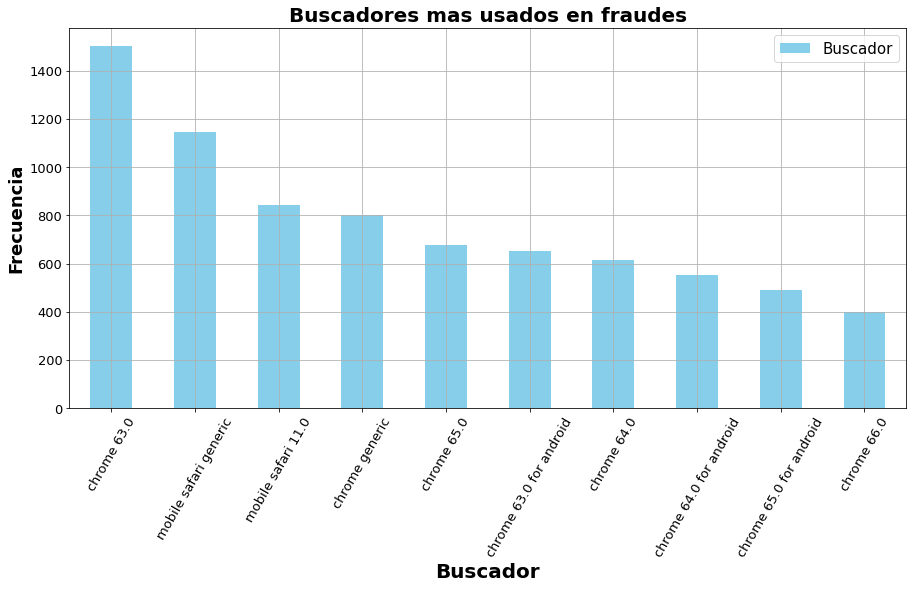

In [ ]:
buscadores_f = fraudes['id_31'].value_counts().to_frame()
buscadores_f.iloc[:10].plot.bar(logy=True, figsize=(15, 7), rot=60, color='skyblue', fontsize=13)
plt.title('Buscadores mas usados en fraudes', fontsize = 20, fontweight='bold')
plt.xlabel('Buscador', fontsize=20, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=18, fontweight='bold')
plt.yscale(value='linear')
plt.legend(('Buscador',), loc='upper right', prop={'size':15})
plt.grid()

plt.show()

# Violin Plot

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

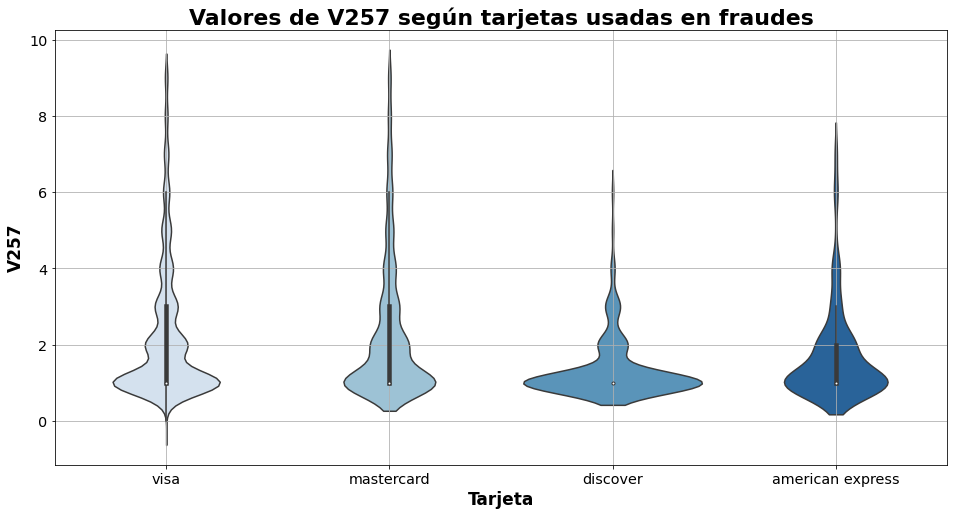

In [ ]:
f2 = fraudes[fraudes['V257'] < 10]
ax = sns.violinplot(x='card4', y='V257', data=f2, palette="Blues")
ax.grid(True)
plt.gcf().set_size_inches(16, 8)
plt.xlabel("Tarjeta" , size = 17, fontweight='bold') 
plt.ylabel("V257" , size = 17, fontweight='bold') 
plt.title("Valores de V257 según tarjetas usadas en fraudes" , size = 22, fontweight='bold')
plt.xticks(size='x-large') 
plt.yticks(size='x-large') 

# Box Plot

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


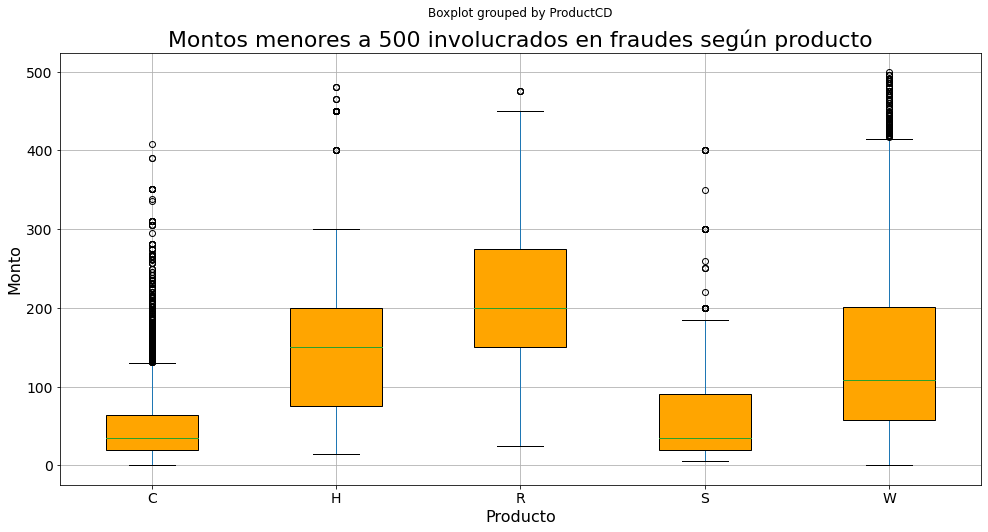

In [ ]:
fraudes[fraudes['TransactionAmt'] < 500].boxplot(by ='ProductCD', column= 'TransactionAmt', figsize=(16,8), patch_artist=True, boxprops=dict(facecolor='orange'), fontsize=14)
plt.title('Montos menores a 500 involucrados en fraudes según producto', fontsize=22)
plt.ylabel('Monto',fontsize=16);
plt.xlabel('Producto',fontsize=16);

# Heat Map

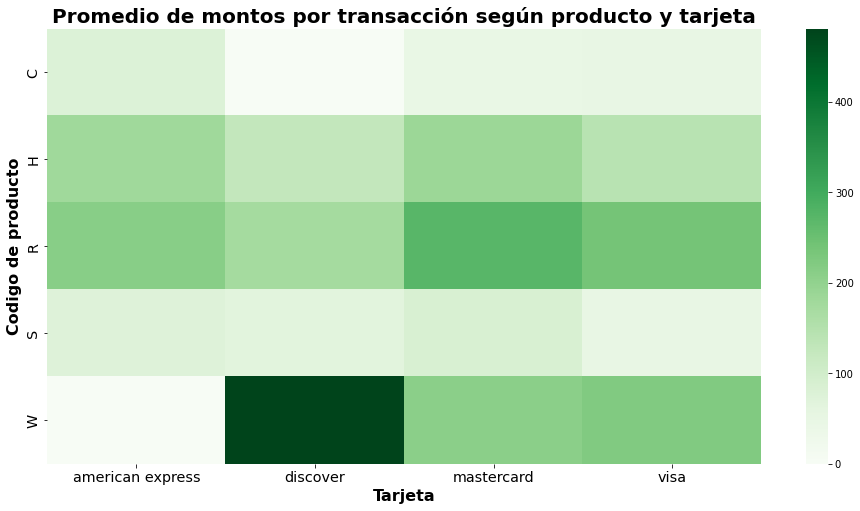

In [ ]:
ff = fraudes.rename(columns={'ProductCD':'Codigo de producto','card4':'Tarjeta'})
s = ff.pivot_table(index="Codigo de producto",columns="Tarjeta", values="TransactionAmt", aggfunc="mean").fillna(0)
plt.figure(figsize=(16, 8))
plt.title('Promedio de montos por transacción según producto y tarjeta', fontsize=20, fontweight='bold')
plt.xlabel('Tarjeta', fontsize=16, fontweight='bold')
plt.ylabel('Código de producto', fontsize=16, fontweight='bold')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
sns.heatmap(s, annot=False, cmap="Greens")

# Grouped Bar Plot

In [ ]:
debito = fraudes[fraudes['card6'] == 'debit']
credito = fraudes[fraudes['card6'] == 'credit']

debito = debito['ProductCD'].value_counts().to_frame()
credito = credito['ProductCD'].value_counts().to_frame()

debito = debito.rename(columns={'ProductCD': 'Debito'})
credito = credito.rename(columns={'ProductCD': 'Credito'})

producto = pd.concat([debito, credito], axis=1).fillna(0).astype(int)
producto.index.name = 'Producto'
producto

,Debito,Credito
Producto,,
W,5942,3006
C,3327,4663
H,696,878
R,394,1032
S,315,371


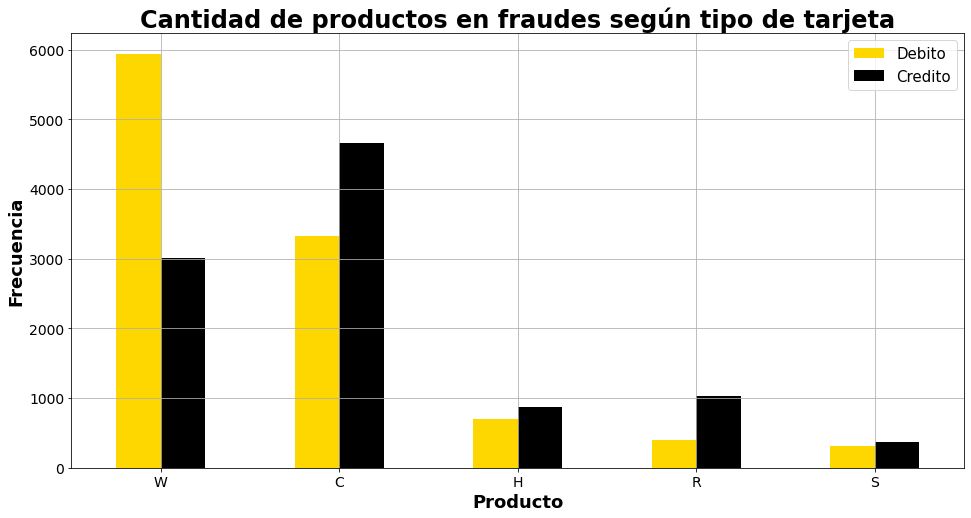

In [ ]:
producto.plot.bar(logy=True, figsize=(16, 8), rot=0, color=['gold', 'black'], fontsize=14)
plt.title('Cantidad de productos en fraudes según tipo de tarjeta', fontsize = 24, fontweight='bold')
plt.xlabel('Producto', fontsize=18, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=18, fontweight='bold')
plt.yscale(value='linear')
plt.legend(loc='upper right', prop={'size':15})
plt.grid()
plt.show()

# Radar Chart

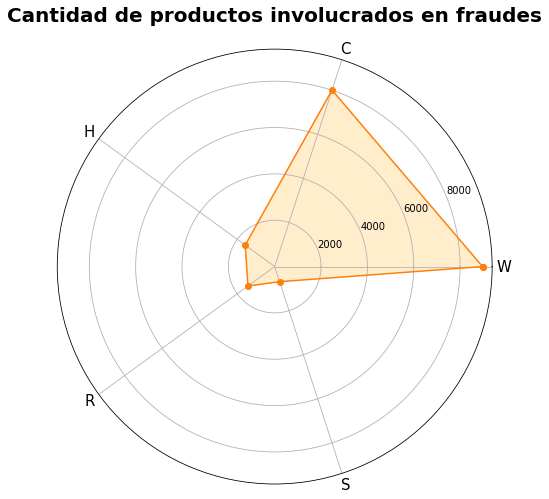

In [ ]:
df = fraudes['ProductCD'].value_counts().to_frame().reset_index()

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection="polar")

theta = np.arange(len(df) + 1) / float(len(df)) * 2 * np.pi
values = df['ProductCD'].values
values = np.append(values, values[0])

l1, = ax.plot(theta, values, color="C1", marker="o", label="ProductCD")
plt.xticks(theta[:-1], df['index'], color='black', size=15)
ax.tick_params(pad=1)

ax.fill(theta, values, 'orange', alpha=0.2)
plt.title("Cantidad de productos involucrados en fraudes", fontsize = 20, fontweight='bold')
plt.show()